In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as kf

In [3]:
(x_train, y_train), (x_test, y_test) = kf.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
# printing x_train[0]
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

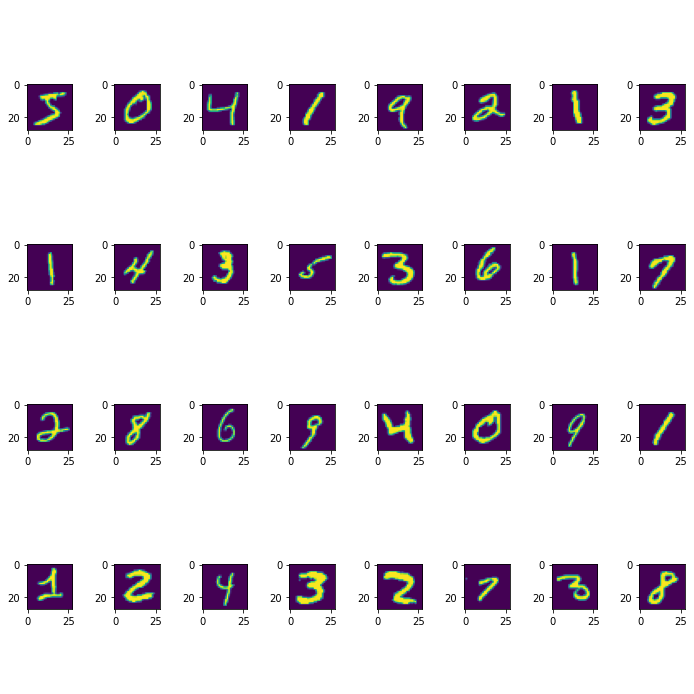

In [8]:
fig, axes = plt.subplots(figsize = (10, 10))
for i in range(0, 32):
      axes.axis('off')
      fig.tight_layout(pad=2.0)
      fig.add_subplot(4, 8, i + 1)
      plt.imshow(x_train[i])      
plt.show()

In [9]:
# printing the first 32 characters of 
y_train[:32]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8], dtype=uint8)

In [10]:
# scaling data

x_train = x_train / 255
x_test = x_test / 255

In [11]:
# reshaping the independent data as required for cnn model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [12]:
# printing x_train[0] after scaling and reshaping
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
# making the CNN

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
cnn = Sequential([
        Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
        MaxPooling2D(pool_size =(2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
        MaxPooling2D(pool_size =(2, 2)),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(20, activation = 'softmax')
])

In [15]:
cnn.compile(
             optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
)

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1

In [16]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 38s 5ms/step - loss: 0.3699 - accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0542 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0098 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.00

In [18]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9905


[0.038900017738342285, 0.9904999732971191]

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1

In [24]:
# saving the model
filepath = "/content/drive/MyDrive/Colab Notebooks/models/mnist_classifier.h5"
cnn.save(filepath)